**Lagrange**

Interpolasi pada x=3 dengan Lagrange adalah 1.0


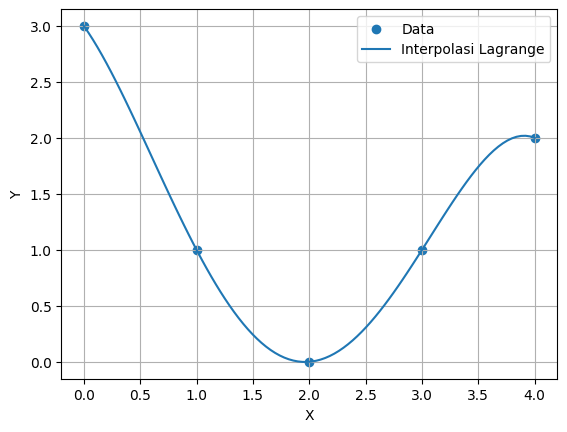

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(data, x):
    result = 0
    n = len(data)

    for i in range(n):
        term = data[i][1]
        for j in range(n):
            if i != j:
                term *= (x - data[j][0]) / (data[i][0] - data[j][0])
        result += term

    return result

# Data yang diberikan
data = [(1, 1), (1, 2), (2, 0), (3, 1), (1, 0), (2, 3), (4, 2), (0, 3), (2, 1), (3, 4)]

# Remove duplicate x-values
unique_data = {}
for x, y in data:
    if x not in unique_data:
        unique_data[x] = y

# Convert back to a list of unique data points
data = list(unique_data.items())

# Contoh penggunaan: Interpolasi pada nilai x=3 dengan Lagrange ordo 9 (max possible order)
x_value = 3
result = lagrange_interpolation(data, x_value)

print(f"Interpolasi pada x={x_value} dengan Lagrange adalah {result}")

# Visualisasi
x_data = [point[0] for point in data]
y_data = [point[1] for point in data]

x_interp = np.linspace(min(x_data), max(x_data), 100)
y_interp = [lagrange_interpolation(data, x) for x in x_interp]

plt.scatter(x_data, y_data, label="Data")
plt.plot(x_interp, y_interp, label=f"Interpolasi Lagrange")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


**NEWTON**

Interpolasi pada x=3 dengan metode Newton adalah 1.0


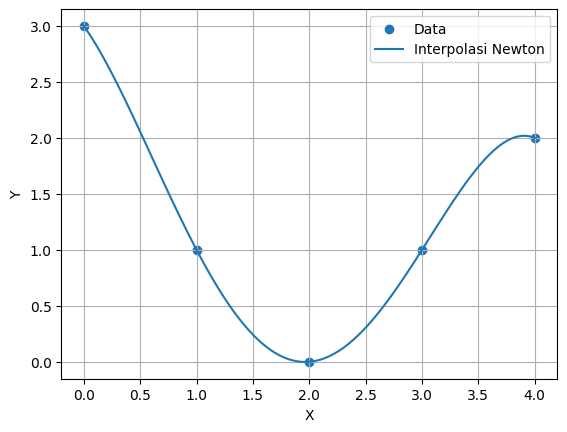

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def divided_difference_table(data):
    n = len(data)
    table = np.zeros((n, n))

    for i in range(n):
        table[i, 0] = data[i][1]

    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (data[i + j][0] - data[i][0])

    return table[0, :]

def newton_interpolation(data, x):
    n = len(data)
    result = 0
    coefficients = divided_difference_table(data)

    for i in range(n):
        term = coefficients[i]
        for j in range(i):
            term *= (x - data[j][0])
        result += term

    return result

# Data yang diberikan
data = [(1, 1), (1, 2), (2, 0), (3, 1), (1, 0), (2, 3), (4, 2), (0, 3), (2, 1), (3, 4)]

# Remove duplicate x-values
unique_data = {}
for x, y in data:
    if x not in unique_data:
        unique_data[x] = y

# Convert back to a list of unique data points
data = list(unique_data.items())

# Contoh penggunaan: Interpolasi pada nilai x=3 dengan metode Newton
x_value = 3
result_newton = newton_interpolation(data, x_value)

print(f"Interpolasi pada x={x_value} dengan metode Newton adalah {result_newton}")

# Visualisasi
x_data = [point[0] for point in data]
y_data = [point[1] for point in data]

x_interp = np.linspace(min(x_data), max(x_data), 100)
y_interp = [newton_interpolation(data, x) for x in x_interp]

plt.scatter(x_data, y_data, label="Data")
plt.plot(x_interp, y_interp, label=f"Interpolasi Newton")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


**Titik Tetap**

[0.05, -0.002116115029842644]


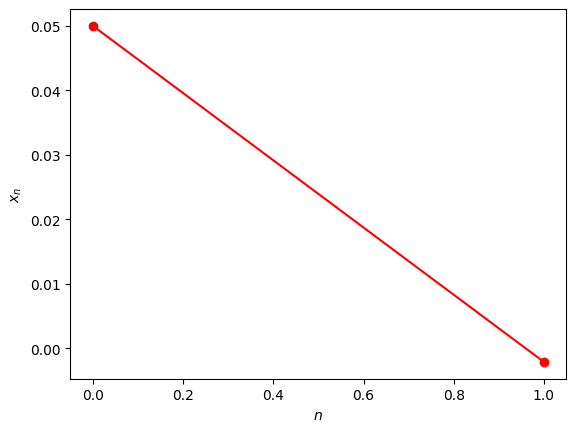

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**3 - 4*x**2 + 5*x) / 4

def g(x):
    return x - f(x) / (3*x**2/4 - 2*x + 5/4)  # Fixed the syntax error here

tol = 1e-10
delta = 1000
xn = 0.05  # Adjust the initial value as needed
xd = []

while delta > tol:
    xd.append(xn)
    xnp1 = g(xn)
    delta = abs(xnp1 - xn)
    xn = xnp1

print(xd)

n = np.arange(len(xd))
plt.plot(n, xd, '-or')
plt.xlabel('$n$')
plt.ylabel('$x_n$')
plt.show()


## **Newton Raphson**

Metode Newton-Raphson:
   Step  x  f(x)  f'(x)  hasil  Delta x
0     1  0   0.0   1.25    0.0      0.0


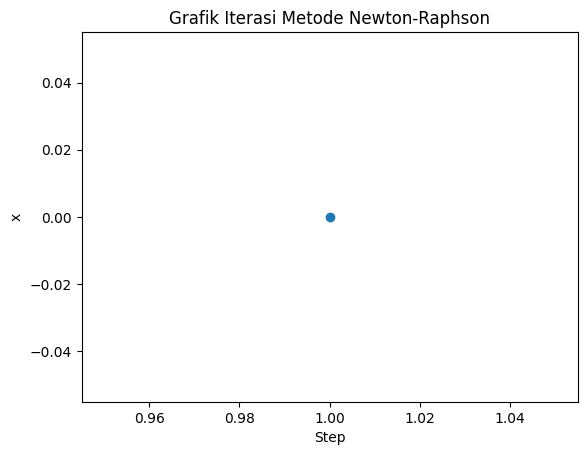

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()
m Python
Default (GPT-3.5)
jelaskan import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()
ChatGPT
Kode yang Anda berikan melakukan implementasi Metode Newton-Raphson untuk mencari akar dari suatu persamaan. Pertama, persamaan dan turunannya dihitung. Kemudian, dalam iterasi, nilai x diperbarui menggunakan rumus Metode Newton-Raphson. Iterasi berhenti jika selisih antar iterasi kurang dari toleransi yang ditentukan atau setelah mencapai jumlah iterasi maksimum.
Hasil iterasi ditampilkan dalam bentuk dataframe Pandas dan grafik yang menunjukkan bagaimana nilai x berubah dari setiap iterasi ke iterasi berikutnya. Dengan demikian, Anda dapat memeriksa perubahan nilai x dan konvergensi nilai tersebut ke nilai akar yang dicari.
m Python
Default (GPT-3.5)
jelaskan import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()
ChatGPT
Kode yang Anda berikan melakukan implementasi Metode Newton-Raphson untuk mencari akar dari suatu persamaan. Pertama, persamaan dan turunannya dihitung. Kemudian, dalam iterasi, nilai x diperbarui menggunakan rumus Metode Newton-Raphson. Iterasi berhenti jika selisih antar iterasi kurang dari toleransi yang ditentukan atau setelah mencapai jumlah iterasi maksimum.
Hasil iterasi ditampilkan dalam bentuk dataframe Pandas dan grafik yang menunjukkan bagaimana nilai x berubah dari setiap iterasi ke iterasi berikutnya. Dengan demikian, Anda dapat memeriksa perubahan nilai x dan konvergensi nilai tersebut ke nilai akar yang dicari.
melakukan implementasi Metode Newton-Raphson untuk mencari akar dari suatu persamaan. Pertama, persamaan dan turunannya dihitung. Kemudian, dalam iterasi, nilai x diperbarui menggunakan rumus Metode Newton-Raphson. Iterasi berhenti jika selisih antar iterasi kurang dari toleransi yang ditentukan atau setelah mencapai jumlah iterasi maksimum.
Hasil iterasi ditampilkan dalam bentuk dataframe Pandas dan grafik yang menunjukkan bagaimana nilai x berubah dari setiap iterasi ke iterasi berikutnya. Dengan demikian, Anda dapat memeriksa perubahan nilai x dan konvergensi nilai tersebut ke nilai akar yang dicari.melakukan implementasi Metode Newton-Raphson untuk mencari akar dari suatu persamaan. Pertama, persamaan dan turunannya dihitung. Kemudian, dalam iterasi, nilai x diperbarui menggunakan rumus Metode Newton-Raphson. Iterasi berhenti jika selisih antar iterasi kurang dari toleransi yang ditentukan atau setelah mencapai jumlah iterasi maksimum.
Hasil iterasi ditampilkan dalam bentuk dataframe Pandas dan grafik yang menunjukkan bagaimana nilai x berubah dari setiap iterasi ke iterasi berikutnya. Dengan demikian, Anda dapat memeriksa perubahan nilai x dan konvergensi nilai tersebut ke nilai akar yang dicari.melakukan implementasi Metode Newton-Raphson untuk mencari akar dari suatu persamaan. Pertama, persamaan dan turunannya dihitung. Kemudian, dalam iterasi, nilai x diperbarui menggunakan rumus Metode Newton-Raphson. Iterasi berhenti jika selisih antar iterasi kurang dari toleransi yang ditentukan atau setelah mencapai jumlah iterasi maksimum.
Hasil iterasi ditampilkan dalam bentuk dataframe Pandas dan grafik yang menunjukkan bagaimana nilai x berubah dari setiap iterasi ke iterasi berikutnya. Dengan demikian, Anda dapat memeriksa perubahan nilai x dan konvergensi nilai tersebut ke nilai akar yang dicari.melakukan implementasi Metode Newton-Raphson untuk mencari akar dari suatu persamaan. Pertama, persamaan dan turunannya dihitung. Kemudian, dalam iterasi, nilai x diperbarui menggunakan rumus Metode Newton-Raphson. Iterasi berhenti jika selisih antar iterasi kurang dari toleransi yang ditentukan atau setelah mencapai jumlah iterasi maksimum.
Hasil iterasi ditampilkan dalam bentuk dataframe Pandas dan grafik yang menunjukkan bagaimana nilai x berubah dari setiap iterasi ke iterasi berikutnya. Dengan demikian, Anda dapat memeriksa perubahan nilai x dan konvergensi nilai tersebut ke nilai akar yang dicari.melakukan implementasi Metode Newton-Raphson untuk mencari akar dari suatu persamaan. Pertama, persamaan dan turunannya dihitung. Kemudian, dalam iterasi, nilai x diperbarui menggunakan rumus Metode Newton-Raphson. Iterasi berhenti jika selisih antar iterasi kurang dari toleransi yang ditentukan atau setelah mencapai jumlah iterasi maksimum.
Hasil iterasi ditampilkan dalam bentuk dataframe Pandas dan grafik yang menunjukkan bagaimana nilai x berubah dari setiap iterasi ke iterasi berikutnya. Dengan demikian, Anda dapat memeriksa perubahan nilai x dan konvergensi nilai tersebut ke nilai akar yang dicari.melakukan implementasi Metode Newton-Raphson untuk mencari akar dari suatu persamaan. Pertama, persamaan dan turunannya dihitung. Kemudian, dalam iterasi, nilai x diperbarui menggunakan rumus Metode Newton-Raphson. Iterasi berhenti jika selisih antar iterasi kurang dari toleransi yang ditentukan atau setelah mencapai jumlah iterasi maksimum.
Hasil iterasi ditampilkan dalam bentuk dataframe Pandas dan grafik yang menunjukkan bagaimana nilai x berubah dari setiap iterasi ke iterasi berikutnya. Dengan demikian, Anda dapat memeriksa perubahan nilai x dan konvergensi nilai tersebut ke nilai akar yang dicari.import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 0.05  # Toleransi
max_iterasi = 3  # Ubah menjadi 3 iterasi

# Inisialisasi variabel awal
x = 0   # Hitungan iterasi awal
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()

### **Newton Raphson v2**

Metode Newton-Raphson:
   Step             x          f(x)     f'(x)         hasil       Delta x
0     1  5.000000e-02  6.003125e-02  1.151875 -2.116115e-03  5.211612e-02
1     2 -2.116115e-03 -2.649624e-03  1.254236 -3.574034e-06  2.112541e-03
2     3 -3.574034e-06 -4.467555e-06  1.250007 -1.021894e-11  3.574024e-06
3     4 -1.021894e-11 -1.277367e-11  1.250000 -8.354201e-23  1.021894e-11


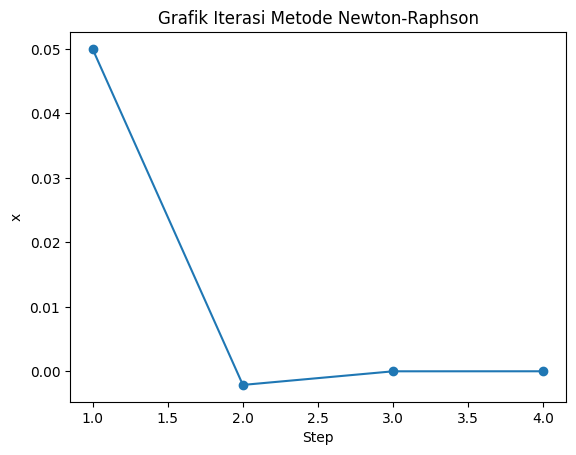

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 1e-6  # Mengubah toleransi menjadi nilai yang lebih kecil
max_iterasi = 100

# Inisialisasi variabel awal
x = 0.05   # Mengubah nilai awal x
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 1e-6  # Mengubah toleransi menjadi nilai yang lebih kecil
max_iterasi = 100

# Inisialisasi variabel awal
x = 0.05   # Mengubah nilai awal x
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 1e-6  # Mengubah toleransi menjadi nilai yang lebih kecil
max_iterasi = 100

# Inisialisasi variabel awal
x = 0.05   # Mengubah nilai awal x
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()import numpy as npimport pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 1e-6  # Mengubah toleransi menjadi nilai yang lebih kecil
max_iterasi = 100

# Inisialisasi variabel awal
x = 0.05   # Mengubah nilai awal x
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()Kode yang diberikan telah dimodifikasi dengan perubahan pada beberapa parameter. Toleransi iterasi telah diubah menjadi nilai yang lebih kecil (1e-6) dan nilai awal x juga telah diubah. Perubahan ini dapat memengaruhi konvergensi dan jumlah langkah yang diperlukan agar algoritma mencapai hasil yang diinginkan.
Metode Newton-Raphson dijalankan dalam loop dengan nilai-nilai yang telah diubah tersebut, dan hasil iterasi ditampilkan dalam bentuk dataframe serta grafik yang memvisualisasikan bagaimana nilai x berubah dari iterasi ke iterasi selama proses berlangsung. Hal ini membantu untuk memahami konvergensi nilai x terhadap akar yang dicari dengan menggunakan metode ini.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi parameter
tol = 1e-6  # Mengubah toleransi menjadi nilai yang lebih kecil
max_iterasi = 100

# Inisialisasi variabel awal
x = 0.05   # Mengubah nilai awal x
n = 1   # Nilai x awal

# Inisialisasi DataFrame untuk menyimpan hasil iterasi
iterasi_data = []

# Iterasi menggunakan metode Newton-Raphson
while n <= max_iterasi:
    fx =  (x**3 - 4*x**2 + 5*x)/4  # Persamaan yang diberikan
    dfx =  (3*x**2/4 - 2*x + 5/4)  # Turunan dari persamaan fx

    # Hitung nilai xnp1
    xnp1 = x - fx / dfx

    # Hitung selisih antar iterasi
    delta_x = abs(xnp1 - x)   # |x_n+1 - x_n|

    # Simpan hasil iterasi
    iterasi_data.append([n, x, fx, dfx, xnp1, delta_x])

    # Hentikan iterasi jika selisih antar iterasi kurang dari toleransi
    if delta_x < tol:
        break

    x = xnp1
    n += 1

# Buat DataFrame Pandas untuk menyimpan hasil iterasi
df = pd.DataFrame(iterasi_data, columns=['Step', 'x', 'f(x)', "f'(x)", 'hasil', 'Delta x'])

# Menampilkan hasil iterasi
print("Metode Newton-Raphson:")
print(df)

# Plot grafik iterasi
plt.plot(df['Step'], df['x'], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('Grafik Iterasi Metode Newton-Raphson')
plt.show()

SEKAN 3 ITERASI

[0.05, 0.0, 0.05, 0.0]


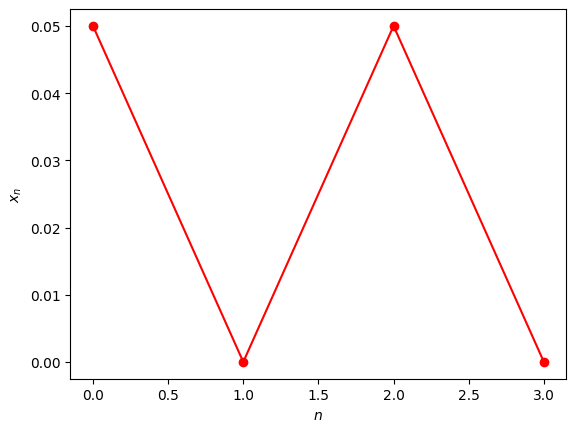

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**3 - 4*x**2 + 5*x) / 4

tol = 1e-10
delta = 1000
xn = 0.05
xd = []

while delta > tol:
    xd.append(xn)  # Perubahan disini, menggunakan xn bukan x0
    xnp1 = xn - (f(xn) * (xn - x0)) / (f(xn) - f(x0))  # Perubahan disini, menggunakan xn bukan x0
    delta = abs(xnp1 - xn)
    xn, x0 = xnp1, xn  # Perubahan disini, urutan diubah agar xn diupdate terlebih dahulu

# Reset nilai delta dan lakukan iterasi lagi
delta = 1000
xn = xd[-2]
x0 = xd[-1]

while delta > tol:
    xd.append(xn)
    xnp1 = xn - (f(xn) * (xn - x0)) / (f(xn) - f(x0))
    delta = abs(xnp1 - xn)
    xn, x0 = xnp1, xn

print(xd)

n = np.arange(len(xd))
plt.plot(n, xd, '-or')
plt.xlabel('$n$')
plt.ylabel('$x_n$')
plt.show()


[0.05, -0.0021, 8.625811733854825e-05, 1.4475327256815898e-07, -9.989390523241219e-12]


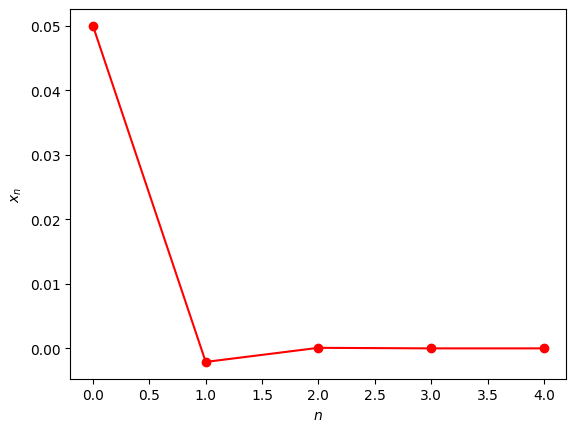

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**3 - 4*x**2 + 5*x) / 4

tol = 1e-10
delta = 1000
x0 = 0.05
x1 = -0.0021
xd = []

while delta > tol:
    xd.append(x0)
    xnp1 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
    delta = abs(xnp1 - x0)
    x0, x1 = x1, xnp1

# Iterasi berikutnya menggunakan nilai akhir dari iterasi sebelumnya
x0 = xd[-2]
x1 = xd[-1]

while delta > tol:
    xd.append(x0)
    xnp1 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
    delta = abs(xnp1 - x0)
    x0, x1 = x1, xnp1

print(xd)

n = np.arange(len(xd))
plt.plot(n, xd, '-or')
plt.xlabel('$n$')
plt.ylabel('$x_n$')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fungsi(x):
    return (x**3 - 4*x**2 + 5*x) / 4

def nilai_sekant(x1, x2):
    f_x1 = fungsi(x1)
    f_x2 = fungsi(x2)
    sekant = (f_x2 - f_x1) / (x2 - x1)
    return sekant

# Interval
x1 = 0
x2 = 0.05

# Hitung nilai sekant
hasil_sekant = nilai_sekant(x1, x2)

# Buat data untuk plot grafik
x = np.linspace(0, 0.1, 100)
y = fungsi(x)

# Plot fungsi
plt.plot(x, y, label='Fungsi $\\frac{x^3 - 4x^2 + 5x}{4}$')

# Tandai titik x1 dan x2 pada grafik
plt.scatter([x1, x2], [fungsi(x1), fungsi(x2)], color='red')

# Tambahkan garis sekant
plt.plot([x1, x2], [fungsi(x1), fungsi(x2)], '--', color='orange', label='Sekant')

plt.title('Grafik Fungsi dan Sekant')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Nilai sekant antara x1 = {x1} dan x2 = {x2} adalah: {hasil_sekant}")


ZeroDivisionError: ignored

JACOBI

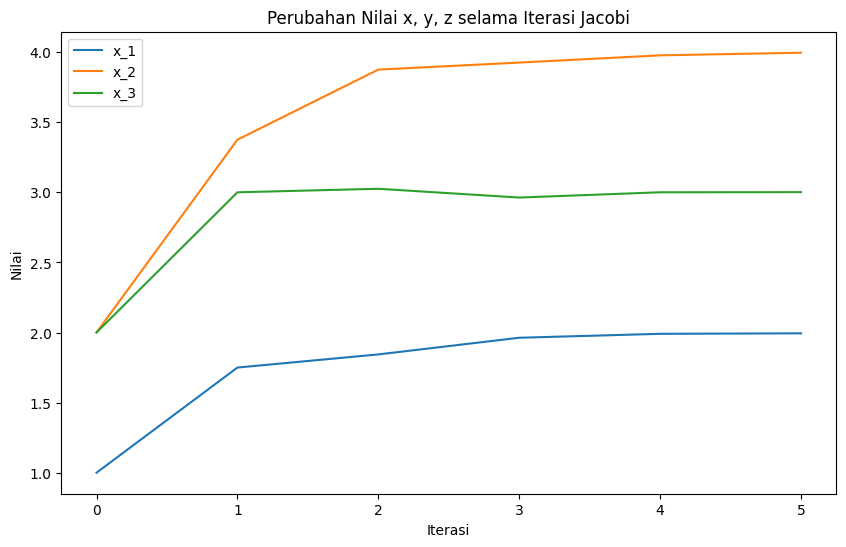

Solution by Gauss-Jacobi Method:
x = 1.994140625
y = 3.9953125
z = 3.0009375

Iterations are tabulated as below
Iteration	x	y	z
1	1.0	2.0	2.0
2	1.75	3.375	3.0
3	1.84375	3.875	3.025
4	1.9625	3.925	2.9625
5	1.990625	3.9765625	3.0
6	1.994140625	3.9953125	3.0009375


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_iteration(A, b, x0, max_iterations=5):
    n = len(b)
    x = np.array(x0, dtype=float)
    x_new = np.zeros_like(x)

    # List untuk menyimpan nilai x pada setiap iterasi
    iter_results = [x.copy()]

    for k in range(max_iterations):
        for i in range(n):
            sigma = np.dot(A[i, :], x) - A[i, i] * x[i]
            x_new[i] = (b[i] - sigma) / A[i, i]

        x = x_new.copy()

        # Tambahkan nilai x pada setiap iterasi ke dalam list
        iter_results.append(x.copy())

    return x, iter_results

# Persamaan linear
A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]])
b = np.array([7, -21, 15])

# Kondisi awal
initial_guess = [1, 2, 2]

# Selesaikan dengan metode Jacobi
solution_jacobi, iter_results_jacobi = jacobi_iteration(A, b, initial_guess, max_iterations=5)

# Visualisasi hasil iterasi
iter_results_jacobi = np.array(iter_results_jacobi).T
iterations = range(len(iter_results_jacobi[0]))

plt.figure(figsize=(10, 6))

for i in range(len(solution_jacobi)):
    plt.plot(iterations, iter_results_jacobi[i], label=f"x_{i + 1}")

plt.xlabel("Iterasi")
plt.ylabel("Nilai")
plt.legend()
plt.title("Perubahan Nilai x, y, z selama Iterasi Jacobi")
plt.show()

# Tampilkan hasil
print("Solution by Gauss-Jacobi Method:")
print(f"x = {solution_jacobi[0]}")
print(f"y = {solution_jacobi[1]}")
print(f"z = {solution_jacobi[2]}")

# Tampilkan hasil iterasi
print("\nIterations are tabulated as below")
print("Iteration\tx\ty\tz")
for i, result in enumerate(iter_results_jacobi.T):
    print(f"{i+1}\t{result[0]}\t{result[1]}\t{result[2]}")


GAUSS-SEIDEL

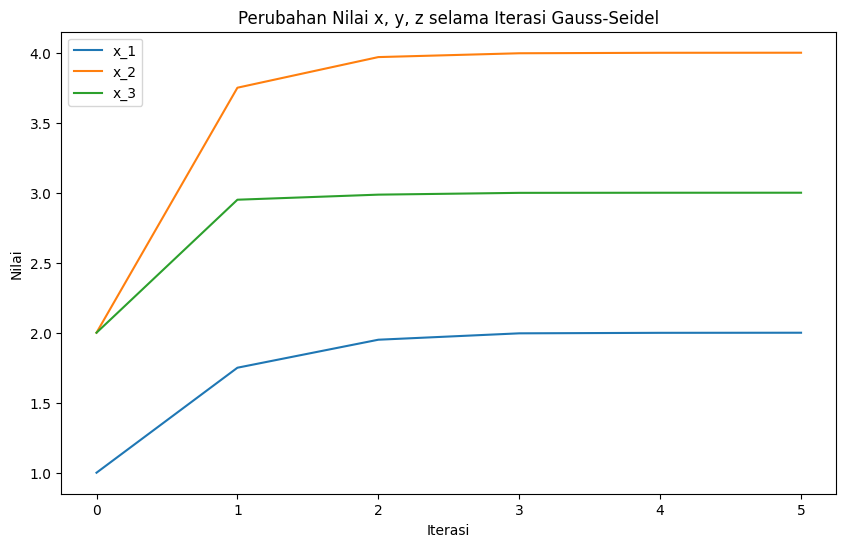

Solution by Gauss-Seidel Method:
x = 1.9999269531250001
y = 3.99993896484375
z = 2.99998298828125

Iterations are tabulated as below
Iteration	x	y	z
1	1.0	2.0	2.0
2	1.75	3.75	2.95
3	1.95	3.96875	2.98625
4	1.995625	3.99609375	2.9990312500000003
5	1.999265625	3.99951171875	2.99980390625
6	1.9999269531250001	3.99993896484375	2.99998298828125


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel_iteration(A, b, x0, max_iterations=5):
    n = len(b)
    x = np.array(x0, dtype=float)

    # List untuk menyimpan nilai x pada setiap iterasi
    iter_results = [x.copy()]

    for k in range(max_iterations):
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i + 1:], x[i + 1:])
            x[i] = (b[i] - sigma) / A[i, i]

        # Tambahkan nilai x pada setiap iterasi ke dalam list
        iter_results.append(x.copy())

    return x, iter_results

# Persamaan linear
A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]])
b = np.array([7, -21, 15])

# Kondisi awal
initial_guess = [1, 2, 2]

# Selesaikan dengan metode Gauss-Seidel
solution_gs, iter_results_gs = gauss_seidel_iteration(A, b, initial_guess, max_iterations=5)

# Visualisasi hasil iterasi
iter_results_gs = np.array(iter_results_gs).T
iterations = range(len(iter_results_gs[0]))

plt.figure(figsize=(10, 6))

for i in range(len(solution_gs)):
    plt.plot(iterations, iter_results_gs[i], label=f"x_{i + 1}")

plt.xlabel("Iterasi")
plt.ylabel("Nilai")
plt.legend()
plt.title("Perubahan Nilai x, y, z selama Iterasi Gauss-Seidel")
plt.show()

# Tampilkan hasil
print("Solution by Gauss-Seidel Method:")
print(f"x = {solution_gs[0]}")
print(f"y = {solution_gs[1]}")
print(f"z = {solution_gs[2]}")

# Tampilkan hasil iterasi
print("\nIterations are tabulated as below")
print("Iteration\tx\ty\tz")
for i, result in enumerate(iter_results_gs.T):
    print(f"{i+1}\t{result[0]}\t{result[1]}\t{result[2]}")


[2.0, 1.7320508075688772, 1.6528916502810695]


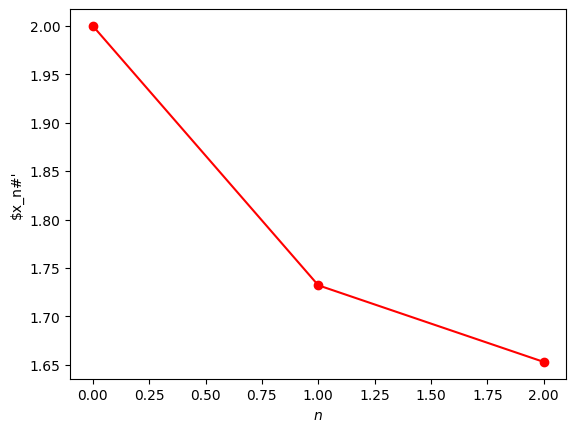

In [ ]:
import numpy as np
import scipy.linalg as la  # Correct the import statement
import sympy as sp
sp.init_printing()
!pip install scipy
!pip install sympy
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
#definisi fumgsi f(x)
def f(x) :
 return (RUMUS)
def g(x) :
 return math.sqrt(x+1)
tol = 0.05 #Toleransi
delta = 1000
xn = 2.0
xd = []
while delta > tol :
 xd.append(xn)
 #xn+1 = g(xn)
 xnp1 = g(xn)
 delta = abs(xnp1 - xn)
 #simpan untuk iterasi berikutnya
 xn = xnp1
print(xd)
[2.0, 1.7320508075688772, 1.6528916502810695, 1.6287699807772333]
#visualisasi
n = np.arange(len(xd))
plt.plot(n,xd,'-or')
plt.xlabel("$n$")
plt.ylabel("$x_n#'")
plt.show()